<img SRC="autos01.jpg">

<center><h1 style="color:#9B59B6">Caso de AN&Aacute;LISIS DE DATOS</h1></center>
<center><h5>Universidad Castro Carazo</h5></center>
<center><h6> III Cuatrimestre - 2022 </h6></center>

<h3 style="color:#9B59B6">Estudiante Mario Alberto Chac&oacute;n Carvajal.<br><br>C&eacute;dula: 109040653</h3>

<p Style = "text-align: justify">Este notebook contiene el an&aacute;lisis de los datos de los veh&iacute;culos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular.

¿C&oacute;mo se puede incrementar las ventas de autos de segunda mano? 

Para esto se realiza un an&aacute;lisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las distribuciones de sus lotes de venta, los autos con mayor precio, o caracter&iacute;sticas de los autos, esto para dotar de insumos suficientes a la toma de decisiones.</p>
</br>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile"> Fuente de Datos para el proceso de an&aacute;lisis </a>

<h2 Style="color:#001283">1. Carga y estandarizaci&oacute;n de los set de datos</h2>

<p>Que se hace en esta etapa?</p>

<ol>
    <li>Importar las librerias de necesarias</li>
    <li>Importar el o los set de datos</li>
    <li>Revisar los ecabezados de los DataFrames</li>
    <li>Si solo Si temenos mas de 1 set de datos - Unir los set de datos en un unico Dataframe</li>
</ol>

<h3 Style="color:#2082d8">1.1 Importar las librerias</h3>

In [1]:
import pandas as pd       #Se usa para el manejo de los DataFrame
import numpy as np        #Se usa para el manejo de las estructuras de datos (Array, Listas, Tuplas, Diccionarios)
import matplotlib.pyplot as plt #Se usa para crear las graficas.

<h3 Style="color:#2082d8">1.2 Importar los Set de Datos</h3>

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors", 
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]

# df = Data Frame
df_1er_autos = pd.read_csv("autos.csv", names=cols)
df_2do_autos = pd.read_csv("Autos1.csv", names=cols)

In [3]:
df_1er_autos.shape

(197, 26)

In [4]:
df_2do_autos.shape

(29, 26)

In [5]:
df_1er_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df_1er_autos.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_2do_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669


In [8]:
df_2do_autos.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
28,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [9]:
df_1er_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h3 Style="color:#2082d8"> 1.3. Revisar los encabezados de los DataFrame </h3>

<p> Se motiva la estandarizacion de los nombres de las columnas, considerando lo siguiente </p>

<ol>
    <li>Los nombres de las columnas no deben contener espacios en blanco</li>
    <li>Los nombres no deben empezar por numeros</li>
    <li>Si el nombre se conforma por 2 0 mas palabras la letra inicial de cada palabra va en mayuscula</li>
    <li>No deben existir nombres repetidos</li>
</ol>

In [10]:
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [11]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [12]:
df_1er_autos.rename({'engine-size': 'engineSize'}, axis=1, inplace=True)
df_2do_autos.rename({'engine-size': 'engineSize'}, axis=1, inplace=True)
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [13]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h3 Style="color:#2082d8"> 1.4. Revisi&oacute;n de variables</h3> 

<p> Este proceso de revision permite identificar variables o datos que deben ser analizados de manera independiente, porque no concuerdan con la metadata </p>

In [14]:
df_1er_autos.describe()

,symboling,base,length,width,heingt,curb,engineSize,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [15]:
df_1er_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engineSize   197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [16]:
df_1er_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
temp = df_1er_autos.groupby(['style']).count()
temp = temp.iloc[:,:1]
temp

,symboling
style,
convertible,6
hardtop,8
hatchback,70
sedan,90
wagon,23


<h5 Style="color: #778899">1.4 Unir Set de Datos </h5>


In [18]:
unionArchivos = [df_1er_autos, df_2do_autos]
dfAutos = pd.concat(unionArchivos)
dfAutos.shape

(226, 26)

In [19]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h2 style='color:#001283'> 2. Manejo de los valores faltantes o perdidos </h2>

<p>Que se hace en este apartado?</p>

<ol>
    <li>Identificar como se muestran los valores faltantes y los estandarizamos (NaN)</li>
    <li>Contar la cantidad de valores faltantes por variable</li>
    <li>Analisis de imputacion de valores numeros con la media</li>
    <li>Analisis de imputacion de valores categoricos con el mas frecuente</li>
    <li>Eliminar filas con valores faltantes</li>
</ol>

In [20]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


<h3 style='color:#2082d8'> 2.1 Identificar como se muestran los valores faltantes y los estandarizamos (NaN) </h3>

In [21]:
dfAutos.replace('?', np.nan, inplace = True)
dfAutos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h3 style='color:#2082d8'> 2.2 Contar la cantidad de valores faltantes por variable </h3>

In [22]:
dfValoresFaltantes = dfAutos.isnull()
dfValoresFaltantes.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       

In [24]:
dfAutos.describe()

,symboling,base,length,width,heingt,curb,engineSize,compression,City,Higway
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,0.902655,98.626991,173.929646,65.853982,53.728761,2540.597345,126.486726,10.300973,25.477876,31.044248
std,1.271672,5.611570,11.744470,2.015475,2.365420,498.165891,40.340465,4.148393,6.384143,6.767096
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,167.300000,64.200000,52.000000,2205.250000,98.000000,8.625000,20.000000,25.000000
50%,1.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,9.000000,25.000000,30.000000
75%,2.000000,101.800000,180.200000,66.500000,55.600000,2846.250000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h3 style='color:#2082d8'>2.3 An&aacute;lisis de imputaci&oacute;n de valores num&eacute;ricos con la media</h3>

<img src="img02.png" alt="Valores Perdidos">

In [25]:
### Punto de Revision ###

In [26]:
#CODIGO PARA OBTENER la media de la variable
#mean_VARIABLE = dfAutos["VARIABLE"].astype("float").mean(axis=0)
#print("la media de la variable VARIABLE es: ", mean_VARIABLE)
#
#Se toma el número entero del promedio ejemplo de 777.99 tomamos 777 
#
#dfAutos["VARIABLE"].replace(np.nan, NUMERO_ENTERO_DEL_PROMEDIO, inplace = True)
#dfAutos.head(5)

In [27]:
#Obteniendo la media de la variable normalized
mean_normalized = dfAutos["normalized"].astype("float").mean(axis=0)
print("la media de la variable normalized es: ", mean_normalized)

la media de la variable normalized es:  122.28333333333333


In [28]:
dfAutos["normalized"].replace(np.nan, 122, inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [29]:
#CODIGO PARA OBTENER la media de la variable
mean_bore = dfAutos["bore"].astype("float").mean(axis=0)
print("la media de la variable VARIABLE es: ", mean_bore)
#

la media de la variable VARIABLE es:  3.319459459459461


In [30]:
dfAutos["bore"].replace(np.nan, 3, inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [31]:
#CODIGO PARA OBTENER la media de la variable
mean_stroke = dfAutos["stroke"].astype("float").mean(axis=0)
print("la media de la variable stroke es: ", mean_stroke)
#

la media de la variable stroke es:  3.2785135135135075


In [32]:
#Se toma el número entero del promedio ejemplo de 777.99 tomamos 777 
#
dfAutos["stroke"].replace(np.nan, 3, inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [33]:
#CODIGO PARA OBTENER la media de la variable
mean_horsepower = dfAutos["horsepower"].astype("float").mean(axis=0)
print("la media de la variable horsepower es: ", mean_horsepower)
#

la media de la variable horsepower es:  102.98214285714286


In [34]:
#Se toma el número entero del promedio ejemplo de 777.99 tomamos 777 
#
dfAutos["horsepower"].replace(np.nan, 103, inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [35]:
#CODIGO PARA OBTENER la media de la variable
mean_peak = dfAutos["peak"].astype("float").mean(axis=0)
print("la media de la variable peak es: ", mean_peak)
#

la media de la variable peak es:  5100.892857142857


In [36]:
#Se toma el número entero del promedio ejemplo de 777.99 tomamos 777 
#
#En este caso pudo ser 5101. Se sigue la secuencia del ejercicio con 5100
dfAutos["peak"].replace(np.nan, 5100, inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [37]:
#Datos categóricos lo imputamos con el dato más frecuente

<h3 style='color:#2082d8'> 2.4 An&aacute;lisis de imputaci&oacute;n de valores categ&oacute;ricos con el m&aacute;s frecuente</h3>

In [38]:
dfAutos['doors'].value_counts().idxmax()

'four'

In [39]:
dfAutos['doors'].replace(np.nan, 'four', inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 style='color:#2082d8'> 2.5 Eliminar filas con valores faltantes</h3>

In [40]:
dfAutos.dropna(subset = ["price"], axis = 0, inplace = True)
dfAutos.reset_index(drop=True, inplace = True)

In [41]:
dfValoresFaltantes = dfAutos.isnull()
dfValoresFaltantes.head(5)
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

Cylinders
False    222
Name: Cylinders, dtype: int64

engineSize
False    222
Name: engineSize, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    222
Name: bore, dtype: int64

stroke
False    222
Name: stroke, dtype: int64

compression
False    2

<h2 Style="color:#001283">3 Estandarización de los datos</h2>

<p> Que se hace en este apartado? </p>

<ol>
    <li>Se verifica el dominio de la variable y se ajusta, si es necesario</li>
    <li>Se convierten los valores en función de su interpretación </li>
    <li>Se normalizan los datos para que los valores distintos queden entre 0 y 1</li>
    <li>Binning</li>
</ol>

<h3 style='color:#2082d8'>3.1 Verificaci&oacute;n del dominio de variables</h3>

In [42]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
dfAutos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [44]:
dfAutos[['normalized']] = dfAutos[['normalized']].astype("int")
dfAutos[['bore', 'stroke', 'peak', 'horsepower','price']] = dfAutos[['bore', 'stroke', 'peak', 'horsepower', 'price']].astype("float")

In [45]:
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower     float64
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

<h3 style='color:#2082d8'>3.2 Estandarizaci&oacute;n de valores</h3>

In [46]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [47]:
dfAutos["City L/100km"] = 235/dfAutos["City"]
dfAutos["Higway L/100km"] = 235/dfAutos["Higway"]
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462


<h3 style='color:#2082d8'>3.3 Normalizaci&oacute;n de valores</h3>

In [48]:
dfTemp = dfAutos[['length', 'width', 'heingt']]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [49]:
dfAutos['length'] = dfAutos['length']/dfAutos['length'].max()
dfAutos['width'] = dfAutos['width']/dfAutos['width'].max()
dfAutos['heingt'] = dfAutos['heingt']/dfAutos['heingt'].max()

In [50]:
dfTemp2 = dfAutos[['length', 'width', 'heingt']]
dfTemp2.head(5)
# De esa forma los datos quedan en un rango de 0 a 1 (Estandar internacional para poder hacer los datos comparables en caso de que se desee hacerlo)

,length,width,heingt
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h3 style='color:#2082d8'>3.4 Binning</h3>

<h4>(Permite agrupar informacion y poder visualizarlos de mejor forma)</h4>

In [51]:
dfTemp = dfAutos['horsepower']
dfTemp.head(10)

0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
5    110.0
6    110.0
7    110.0
8    140.0
9    101.0
Name: horsepower, dtype: float64

In [52]:
dfAutos.dtypes

symboling           int64
normalized          int32
make               object
fuel               object
aspiration         object
doors              object
style              object
wheels             object
engine             object
base              float64
length            float64
width             float64
heingt            float64
curb                int64
engineType         object
Cylinders          object
engineSize          int64
system             object
bore              float64
stroke            float64
compression       float64
horsepower        float64
peak              float64
City                int64
Higway              int64
price             float64
City L/100km      float64
Higway L/100km    float64
dtype: object

In [53]:
bins = np.linspace(min(dfAutos['horsepower']), max(dfAutos['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

<h4>Categorías entre:</h4>
<h5> 48.0000-119.3333 como Bajo</h5>
<h5>119.3333-190.6667 como Medio</h5>
<h5>190.6667-262.0000 como Alto</h5>

In [54]:
groupNames = ["bajo", 'Medio', 'Alto']
dfAutos['horsepowerBins'] = pd.cut(dfAutos['horsepower'], bins, labels=groupNames, include_lowest=True)
dfAutos[["horsepower", 'horsepowerBins']].head(5)

,horsepower,horsepowerBins
0,111.0,bajo
1,111.0,bajo
2,154.0,Medio
3,102.0,bajo
4,115.0,bajo


In [55]:
dfAutos['horsepowerBins'].value_counts()

bajo     174
Medio     43
Alto       5
Name: horsepowerBins, dtype: int64

<h4>Cantidad de automóviles bajo esas categorias</h4>

<h3 style='color:#b676b1'>Histograma</h3>

Text(0.5, 1.0, 'horsepower')

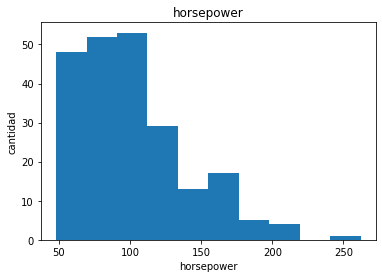

In [56]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(dfAutos["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("horsepower")

<h3 style='color:#b676b1'>Gr&aacute;fico de barras verticales</h3>

Text(0.5, 1.0, 'horsepower')

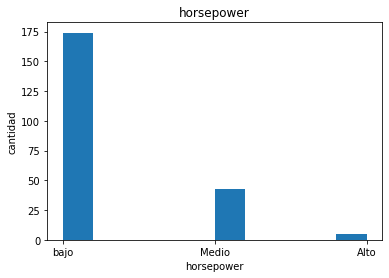

In [57]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(dfAutos["horsepowerBins"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("horsepower")

In [58]:
dfAutos.head(6)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,bajo
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,9.400000,bajo


<h2 Style="color:#001283">4. Visualización de Datos</h2>

<p>En este apartado se van a crear diferentes visualizaciones (Gráficas), las cuales nos ayudan a realizar la interpretaion y analisis de la informacion del set.</p>
<p>Estos son tres elementos fundamentales para poder crear las visualizaciones:</p>
<ol>
    <li>Preguntas de negocio a responder</li>
    <li>Pleno conocimiento del set de datos</li>
    <li>Experiencia de negocio</li>
</ol>

In [59]:
#Se agrupan los datos por categoria
gf1 = dfAutos.groupby(['horsepowerBins']).count()
# se extrae el indice y la primera columna con datos
#iloc es para hacer una selección
gf1 = gf1.iloc[:,0:1]
#gf1 = gf1.iloc[:,3:4]
gf1

,symboling
horsepowerBins,
bajo,174
Medio,43
Alto,5


<h3 style='color:#b676b1'>Gr&aacute;fico de barras verticales</h3>

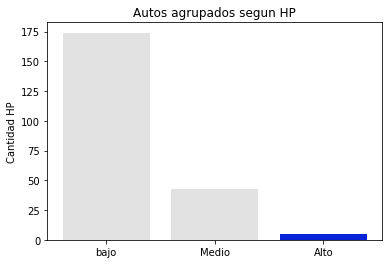

In [60]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

#eje_x =  ["bajo", 'Medio', 'Alto']
eje_x = gf1.index.tolist()
eje_y = gf1['symboling'].tolist()
#bar_labels = ['Bajo', 'Medio', 'Alto']
bar_colors = ['#e2e2e2', '#e2e2e2', '#0623d8']

ax.bar(eje_x, eje_y, color=bar_colors) #label=bar_labels,

ax.set_ylabel('Cantidad HP')
ax.set_title('Autos agrupados segun HP')
#ax.legend(title='HP color')

plt.show()

In [61]:
avg_plazo = gf1["symboling"].astype("float").mean(axis=0)
print ("Promedio: ", avg_plazo)

Promedio:  74.0


In [62]:
#Make

In [63]:
#import matplotlib.pyplot as plt
#import numpy as np

#np.random.seed(19680801)

#plt.rcdefaults()
#fig, ax = plt.subplots()



In [64]:
#Se agrupan los datos por categoria
gf2 = dfAutos.groupby(['make']).count()
# se extrae el indice y la primera colmuna con datos
gf2 = gf2.iloc[:,:1]
gf2

,symboling
make,
alfa-romero,3
audi,6
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,2
jaguar,3
mazda,17


In [65]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,bajo


In [66]:
#Cantidad de autos según marca
gf4 = dfAutos.groupby(['make']).count()
# se extrae el indice y la primera colmuna con datos
gf4 = gf4.iloc[:,:1]
gf4

,symboling
make,
alfa-romero,3
audi,6
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,2
jaguar,3
mazda,17


In [67]:
dfTemp = dfAutos[['fuel', 'style', 'price']]

In [68]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,3.40,23.0,68.0,4500.0,33,38,13845.0,7.121212,6.184211,bajo
218,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,3.40,9.0,88.0,5500.0,25,31,12290.0,9.400000,7.580645,bajo
219,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,3.15,9.5,114.0,5400.0,23,28,12940.0,10.217391,8.392857,bajo
220,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,3.15,9.5,114.0,5400.0,23,28,13415.0,10.217391,8.392857,bajo


In [69]:
#plt.rcdefaults()
#fig, ax = plt.subplots()

<h3 style='color:#b676b1'>Gr&aacute;fico de barras horizontales</h3>

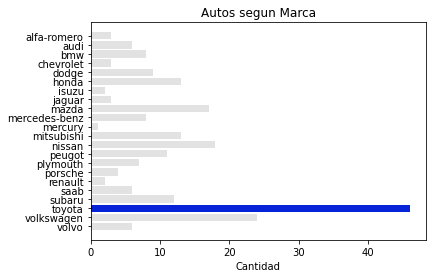

In [70]:

fig, ax = plt.subplots()

eje_x = gf2.index.tolist()
eje_y = gf2['symboling'].tolist()
y_pos = np.arange(len(eje_x))
bar_colors = ['#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2','#e2e2e2', '#e2e2e2',
              '#e2e2e2', '#e2e2e2','#e2e2e2', '#e2e2e2','#e2e2e2', '#e2e2e2',
              '#e2e2e2', '#e2e2e2','#e2e2e2', '#e2e2e2','#e2e2e2', '#e2e2e2',
              '#e2e2e2','#0623d8', '#e2e2e2', '#e2e2e2']

ax.barh(y_pos, eje_y, align='center', color = bar_colors)
ax.set_yticks(y_pos, labels=eje_x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cantidad')
ax.set_title('Autos segun Marca')

plt.show()

In [71]:
dfAutos.describe()

,symboling,normalized,base,length,width,heingt,curb,engineSize,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.909910,122.229730,98.661261,0.836448,0.914389,0.899108,2540.418919,126.450450,3.314369,3.275225,10.323514,102.189189,5093.468468,25.445946,30.990991,12780.941441,9.803749,7.947735
std,1.280198,33.651614,5.648067,0.056322,0.027366,0.039598,494.544729,40.226562,0.262471,0.307282,4.179231,36.334423,481.973832,6.272417,6.701787,7530.446820,2.441520,1.783939
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.000000,94.500000,0.804181,0.891667,0.869565,2209.000000,98.000000,3.150000,3.150000,8.625000,70.000000,4800.000000,20.250000,25.000000,7898.000000,7.833333,6.911765
50%,1.000000,122.000000,97.250000,0.832292,0.909722,0.904682,2414.000000,115.000000,3.270000,3.350000,9.000000,95.000000,5100.000000,25.000000,30.000000,10221.500000,9.400000,7.833333
75%,2.000000,136.250000,102.300000,0.865930,0.923611,0.931020,2841.250000,146.000000,3.580000,3.447500,9.400000,116.000000,5500.000000,30.000000,34.000000,15628.750000,11.610119,9.400000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


<h3 style='color:#b676b1'>Conjunto de histogramas</h3>

<h3>Tomamos una selección de variables y hacemos para cada una un histograma, para conocer su distribucion y comportamiento</h3>

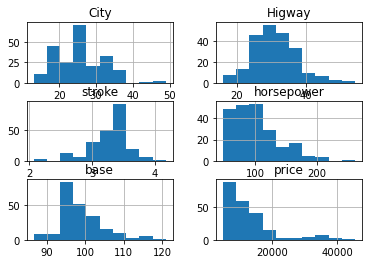

In [72]:
viz = dfAutos[['City','Higway','stroke','horsepower','base','price']]
viz.hist()
plt.show()

<h3 style='color:#b676b1'>Conjunto de datos para an&aacute;lisis multivariante</h3>

horsepowerBins       bajo  Medio  Alto
style                                 
convertible     28.666667  18.00  25.0
hardtop         31.166667  20.50  25.0
hatchback       34.275862  24.50  23.0
sedan           33.621951  22.95  17.0
wagon           29.818182  23.75   NaN


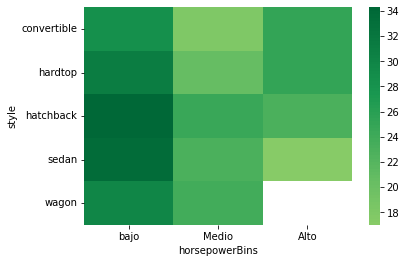

In [73]:
import seaborn as sns

result = pd.pivot_table(data=dfAutos, index='style', columns='horsepowerBins',values='Higway')
#result = pd.pivot_table(data=dfAutos, index='style', columns='horsepowerBins',values='price')

print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=False, cmap = 'RdYlGn', center=0.117)
plt.show()


<h3 style='color:#b676b1'>Gr&aacute;fico de anillos</h3>

In [74]:
#Se agrupan los datos por categoria Estilo
gf3 = dfAutos.groupby(['style']).count()
# se extrae el indice y la primera colmuna con datos
gf3 = gf3.iloc[:,:1]
gf3

,symboling
style,
convertible,8
hardtop,10
hatchback,75
sedan,103
wagon,26


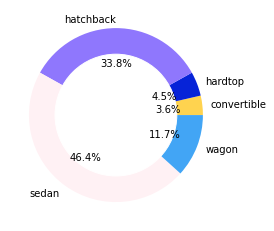

In [75]:
names = gf3.index.tolist()
style = gf3['symboling'].tolist()

my_circle = plt.Circle((0,0), 0.7, color='white')

plt.pie(style, labels=names, autopct='%1.1f%%', colors=['#ffd34f', '#0623d8', '#8f77fd', 
                                                       '#fff1f4', '#42A5F5'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
#2196F3
#1565C0
#1E88E5
#42A5F5
#90CAF9
#E1F5FE

<h2 Style="color:#001283">Referencias</h2>

<a href="https://www.w3schools.com">Link a: w3schools</a>
<br><br>
<a href="https://sitiobigdata.com/2018/10/01/diferentes-formas-importar-datos-python/#">Link a: sitiobigdata.com</a>
<br><br>
<a href="https://rayheberer.medium.com/generating-matplotlib-subplots-programmatically-cc234629b648">Link a: Generating Matplotlib Subplots Programmatically</a>
<br><br>
<a href="https://soloelectronicos.com/2021/12/08/como-seleccionar-columnas-con-pandas/" target="_blank">Link a: soloelectronicos.com</a>
<br><br>
<a href="https://htmlcolors.com/">Link a: https://htmlcolors.com/</a>
<br><br>
<a href="https://www.youtube.com/watch?v=E0XTArOciF0">YOUTUBE: Metodología para proyectos de Data Science y Minería de Datos - CRISP-DM</a>
<br><br>
<a href="https://www.youtube.com/watch?v=UyKkSsEbXkw">YOUTUBE: Qué es CRISP DM (Metodología de Data Mining)</a>
<br><br>

<a href="mailto:mchaconc653@castrocarazo.ac.cr">CONTACTO: mchaconc653@castrocarazo.ac.cr</a>